<a href="https://colab.research.google.com/github/Anjoom765/data_science_fcc/blob/main/complication_of_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**reparing a binary classifier , which will classify the people into complicated and non-complicated based on the data provided** 


LOADING THE DATASET FROM GITHUB REPO

In [131]:
import numpy as np
import pandas as pd


In [132]:
data=pd.read_csv('https://raw.githubusercontent.com/Anjoom765/data_science_fcc/main/Surgical-deepnet.csv')
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0


**producing a brief report of the dataset**

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [134]:
data.shape

(14635, 25)

In [135]:
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

**data analysis**

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
df=data

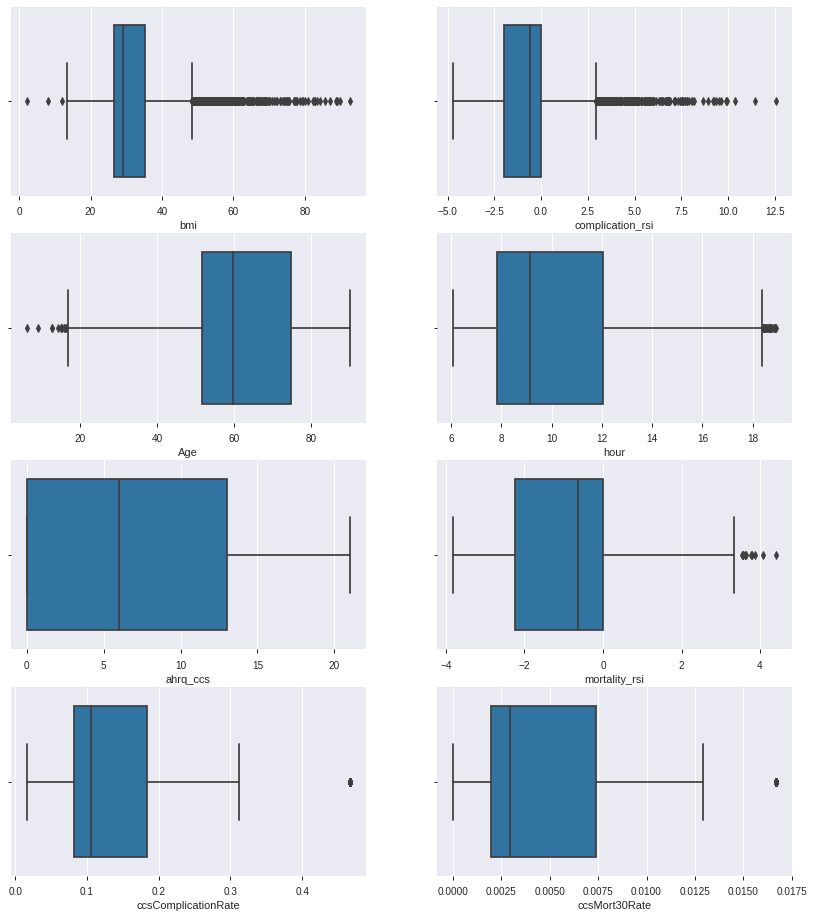

In [138]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 16))
sns.boxplot(x = 'bmi', data = df, ax=axes[0][0])
sns.boxplot(x = 'Age', data = df, ax=axes[1][0])
sns.boxplot(x = 'ahrq_ccs', data = df, ax=axes[2][0])
sns.boxplot(x = 'ccsComplicationRate', data = df, ax=axes[3][0])
sns.boxplot(x = 'ccsMort30Rate', data = df, ax=axes[3][1])
sns.boxplot(x = 'complication_rsi', data = df, ax=axes[0][1])
sns.boxplot(x = 'hour', data = df, ax = axes[1][1])
sns.boxplot(x = 'mortality_rsi', data = df, ax = axes[2][1])

removing outliers

In [139]:
def remove_outliers(data):
  arr=[]
  q1=np.percentile(data,25)
  q3=np.percentile(data,75)
  iqr=q3-q1
  mi =q1-1.5*iqr
  ma =q3+1.5*iqr
  for i in list(data):
        if i<mi:
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
  return arr

In [140]:
data['bmi'] = remove_outliers(data['bmi'])
data['complication_rsi'] = remove_outliers(data['complication_rsi'])
data['Age'] = remove_outliers(data['Age'])
data['hour'] = remove_outliers(data['hour'])
data['ahrq_ccs'] = remove_outliers(data['ahrq_ccs'])
data['mortality_rsi'] = remove_outliers(data['mortality_rsi'])
data['ccsComplicationRate'] = remove_outliers(data['ccsComplicationRate'])
data['ccsMort30Rate'] = remove_outliers(data['ccsMort30Rate'])

In [141]:
df=data

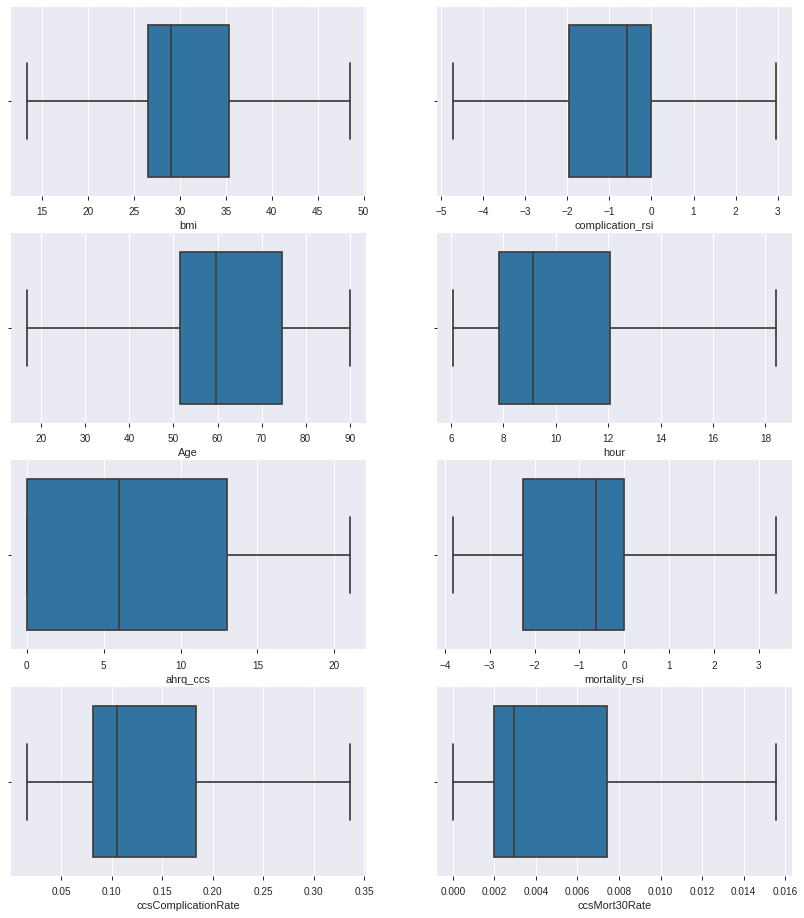

In [142]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 16))
sns.boxplot(x = 'bmi', data = df, ax=axes[0][0])
sns.boxplot(x = 'Age', data = df, ax=axes[1][0])
sns.boxplot(x = 'ahrq_ccs', data = df, ax=axes[2][0])
sns.boxplot(x = 'ccsComplicationRate', data = df, ax=axes[3][0])
sns.boxplot(x = 'ccsMort30Rate', data = df, ax=axes[3][1])
sns.boxplot(x = 'complication_rsi', data = df, ax=axes[0][1])
sns.boxplot(x = 'hour', data = df, ax = axes[1][1])
sns.boxplot(x = 'mortality_rsi', data = df, ax = axes[2][1])

In [143]:
X=df.drop('complication',axis=1)
Y=df['complication']

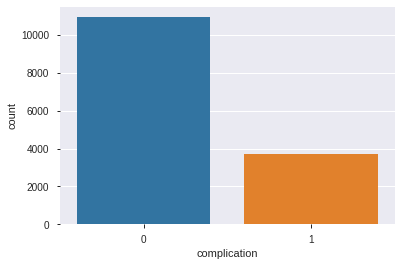

In [144]:
sns.countplot(x='complication', data = df)

In [145]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_res, y_res = sm.fit_resample(X, Y)

print("Before OverSampling, counts of label '1': {}".format(sum(Y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_res==0)))

Before OverSampling, counts of label '1': 3690
Before OverSampling, counts of label '0': 10945 

After OverSampling, the shape of train_X: (21890, 24)
After OverSampling, the shape of train_y: (21890,) 

After OverSampling, counts of label '1': 10945
After OverSampling, counts of label '0': 10945


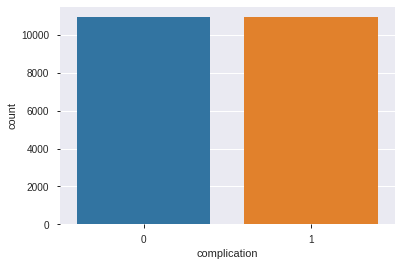

In [146]:
sns.countplot(x = y_res, data = df)

modeling the logestic regression classifier

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [148]:
X_train,X_test,Y_train,Y_test=train_test_split(x_res,y_res,test_size=.2, random_state = 42)


In [149]:
model=LogisticRegression()


In [150]:
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


validating the model with confusion matrix

In [151]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report

In [152]:
matrix=confusion_matrix(y_pred,Y_test)
matrix

array([[1598,  470],
       [ 601, 1709]])

plotting the roc curve

In [153]:
false_positive_rate, true_positive_rate, thresholds =roc_curve(y_pred,Y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7562770562770563

In [154]:
def plot_roc(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

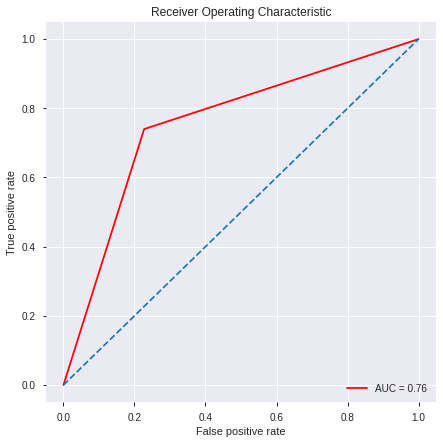

In [155]:
plot_roc(roc_auc)

In [156]:
classification_report(y_pred,Y_test)

'              precision    recall  f1-score   support\n\n           0       0.73      0.77      0.75      2068\n           1       0.78      0.74      0.76      2310\n\n    accuracy                           0.76      4378\n   macro avg       0.76      0.76      0.76      4378\nweighted avg       0.76      0.76      0.76      4378\n'